# Deep Learning Algortihm for Fashion MNIST using CNN with Tensroflow

This project was created together with my friend, Hendra. Please check his kaggle repository to view his work (https://www.kaggle.com/henhim)



In this notebook, we will create a simple - Convolutional Neural Network algorithm to predict Fashion MNIST.

#Data Preparation

##Load Dataset Fashion MNIST

First, lets import our data. The Fashion MNIST dataset can be accessed from Amazon S3 storage. (this code need to be run twice)

In [1]:
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-08-29 07:56:35--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.122
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  89.5MB/s    in 0.3s    

2019-08-29 07:56:36 (89.5 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-29 07:56:38--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.122
Connecting to fashion-mnist.s3

## Import Library

The data is loaded! Now we can import a basic library. For now we will import **numpy** and **matplotlib**. If we need more library, we can import later on.

The **input_data** from tensorflow is used for acessing the MNIST dataset.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)

W0829 07:56:47.393641 140559723067264 deprecation.py:323] From <ipython-input-2-eed6801342c2>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0829 07:56:47.395431 140559723067264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0829 07:56:47.396410 140559723067264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting data/fashion/train-images-idx3-ubyte.gz


W0829 07:56:47.748893 140559723067264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0829 07:56:47.752933 140559723067264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0829 07:56:47.819901 140559723067264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [0]:
import numpy as np                  #Mathematic opreation
import matplotlib.pyplot as plt     #basic plot

%matplotlib inline

##Preprocessing Data

Let us see how much pixel is used to form a one picture

In [4]:
print(fashion_mnist.train.images.shape)
print(fashion_mnist.test.images.shape)
print(fashion_mnist.validation.images.shape) 

(55000, 784)
(10000, 784)
(5000, 784)


We need to make sure there is no missing value on data. We can use this command to check every data. It seems the data is completed (of course it does :D)

In [5]:
datatrain = np.zeros((fashion_mnist.train.labels.shape[0]));       
datatest = np.zeros((fashion_mnist.test.labels.shape[0]));          
datavalid = np.zeros((fashion_mnist.validation.labels.shape[0]));   

for n in range(fashion_mnist.train.labels.shape[0]):
  datatrain[n] = np.argmax(fashion_mnist.train.labels[n])

for n in range(fashion_mnist.test.labels.shape[0]):
  datatest[n] = np.argmax(fashion_mnist.test.labels[n])

for n in range(fashion_mnist.validation.labels.shape[0]):
  datavalid[n] = np.argmax(fashion_mnist.validation.labels[n])

print(datatrain.shape)                                               #Menampilkan jumlah label datatrain
print(datatest.shape)                                                #Menampilkan jumlah label datatest
print(datavalid.shape)                                               #Menampilkan jumlah label datavalid

(55000,)
(10000,)
(5000,)


##Visualizing Dataset

Next, let us check our data using graph. The purpose of this is to make sure the data is balance.

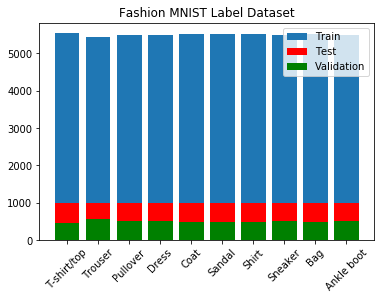

In [6]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
plt.bar(np.unique(datatrain, return_index=False).astype(int), np.bincount(datatrain.astype(int)), label = 'Train')
plt.bar(np.unique(datatest, return_index=False).astype(int), np.bincount(datatest.astype(int)), color = 'red', label = 'Test')
plt.bar(np.unique(datavalid, return_index=False).astype(int), np.bincount(datavalid.astype(int)), color = 'green' , label = 'Validation')
plt.xticks(np.unique(datatrain, return_index=False).astype(int), labels, rotation =45)
plt.title('Fashion MNIST Label Dataset')
plt.legend(loc = 'upper right')
plt.show()

The data is balanced, so we can continue to process the data. Now we need to know what our data looks like. Lets print some sample of them.

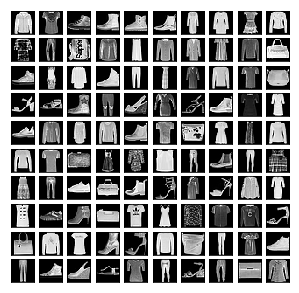

In [7]:
plt.figure(1, figsize=(5,5))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(fashion_mnist.train.images[i].reshape(28,28), interpolation="nearest", cmap="gray")
    plt.xticks([])
    plt.yticks([])

#Making the Model

##CNN Modelling

Because we use CNN with tensorflow, we must setup some configuration. First lets define the input neuron

In [0]:
flat = 784 #the picture size
width = int(np.sqrt(784))        #because the picture is square, the width and height is the square root of  image size              
height = int(np.sqrt(784))                     
class_output = 10                 

Now, we run the tensorflow to make the Convolutional Neuron

In [0]:
import tensorflow as tf           # import tensorflow
sess = tf.InteractiveSession()    # run tensorflow session

Defining input and output

In [0]:
#lets make placeholder for input (x) dan output (y)
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

Lets flatten the image

In [0]:
x_image = tf.reshape(x, [-1,width,height,1]) # -1 for flattenning picture and 1 because the image is grayscale

Now, we define weigth and bias.

In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.01, shape=[32]))
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

Defining activation function for layer 1

In [0]:
h_conv1 = tf.nn.relu(convolve1)

Make max pooling layer within 2x2 pixel.

In [14]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

The layer 1 is done, now we make the second convolutional layer. the process is almost same.

In [0]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.01, shape=[64]))
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2

In [0]:
h_conv2 = tf.nn.relu(convolve2)

In [17]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

Flattening the final output from convolutional layer

In [0]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])

Now we need to configure weight and bias for dropout layer (regularization )

In [0]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.01, shape=[1024])) 
fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1

Same as the other activation function

In [0]:
h_fc1 = tf.nn.relu(fcl)

In [21]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

W0829 07:56:52.814416 140559723067264 deprecation.py:506] From <ipython-input-21-00684a134129>:2: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<tf.Tensor 'dropout/mul_1:0' shape=(?, 1024) dtype=float32>

Next, we define weight and bias for redout layer

In [0]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) 
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
fc=tf.matmul(layer_drop, W_fc2) + b_fc2

applying softmax activation fuction to redout layer

In [0]:
y_CNN= tf.nn.softmax(fc)

The model is done! But we need to make the objective function to give model a parameter for updating its weight. In this model, the model need to minimize error (cross entropy)

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

**Menghitung nilai optimasi modeling**

In [0]:
train_step = tf.train.AdamOptimizer(learning_rate=0.001, epsilon=1e-4).minimize(cross_entropy)

And of course, the accuracy

In [0]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1)), tf.float32))

Its done! Now lets train the model

##Trainning Model

First, run the tensorflow session

In [0]:
sess.run(tf.global_variables_initializer())

Here is the algorithm for training. We will use 100 training batch, and 2 epoch for this training.

In [28]:
train_acc = [] #membuat list kosong untuk dimasukkan dengan value training
val_acc = []
loss_trainplt = []
loss_valplt = []

for i in range(4400):
    batch = fashion_mnist.train.next_batch(100)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        train_acc.append(train_accuracy)
        validation_accuracy = accuracy.eval(feed_dict={x: fashion_mnist.validation.images, y_: fashion_mnist.validation.labels, keep_prob: 1.0})
        val_acc.append(validation_accuracy)
        print("step %d, training accuracy %g"%(i, float(train_accuracy)))
        print("validation accuracy %g"%(float(validation_accuracy)))

        loss_train = sess.run(cross_entropy, feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        loss_val = sess.run(cross_entropy, feed_dict={x: fashion_mnist.validation.images, y_: fashion_mnist.validation.labels, keep_prob: 1.0})
        loss_trainplt.append(loss_train)
        loss_valplt.append(loss_val)
        print("Loss Train ", (loss_train))
        print("Loss Validation ", (loss_val))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.12
validation accuracy 0.1078
Loss Train  3.0333369
Loss Validation  3.3310661
step 100, training accuracy 0.88
validation accuracy 0.8464
Loss Train  0.37969455
Loss Validation  0.43557745
step 200, training accuracy 0.87
validation accuracy 0.8622
Loss Train  0.40820792
Loss Validation  0.38691396
step 300, training accuracy 0.87
validation accuracy 0.8772
Loss Train  0.37756705
Loss Validation  0.3355756
step 400, training accuracy 0.82
validation accuracy 0.8854
Loss Train  0.4617357
Loss Validation  0.3135077
step 500, training accuracy 0.85
validation accuracy 0.8936
Loss Train  0.33934125
Loss Validation  0.30140844
step 600, training accuracy 0.89
validation accuracy 0.8966
Loss Train  0.25021735
Loss Validation  0.29239365
step 700, training accuracy 0.91
validation accuracy 0.893
Loss Train  0.282487
Loss Validation  0.29859787
step 800, training accuracy 0.88
validation accuracy 0.898
Loss Train  0.34882343
Loss Validation  0.27594
step 900, train

Its pretty good right? But its not appealing, lets make the graph!

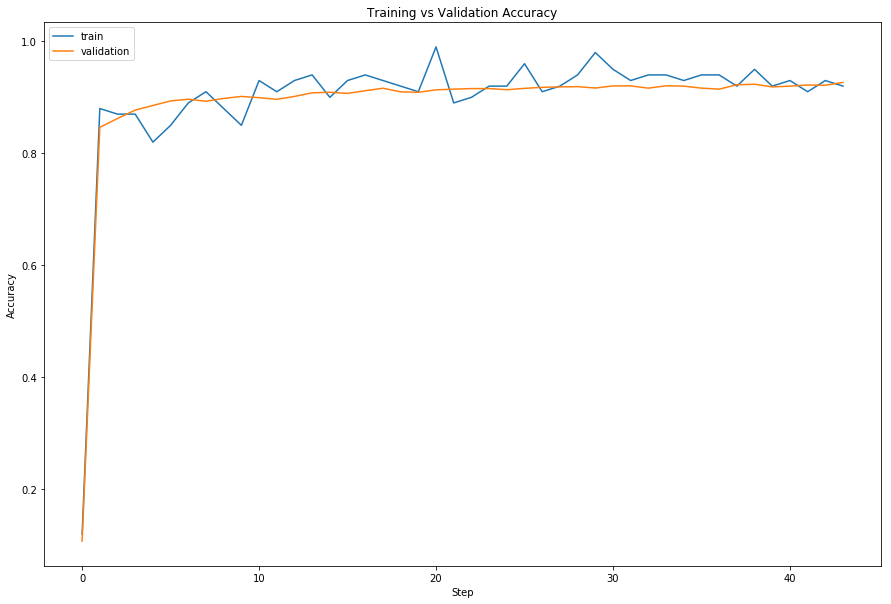

In [29]:
plt.figure(figsize=(15,10))    
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Step')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Menampilkan Loss dari data training dan validation**

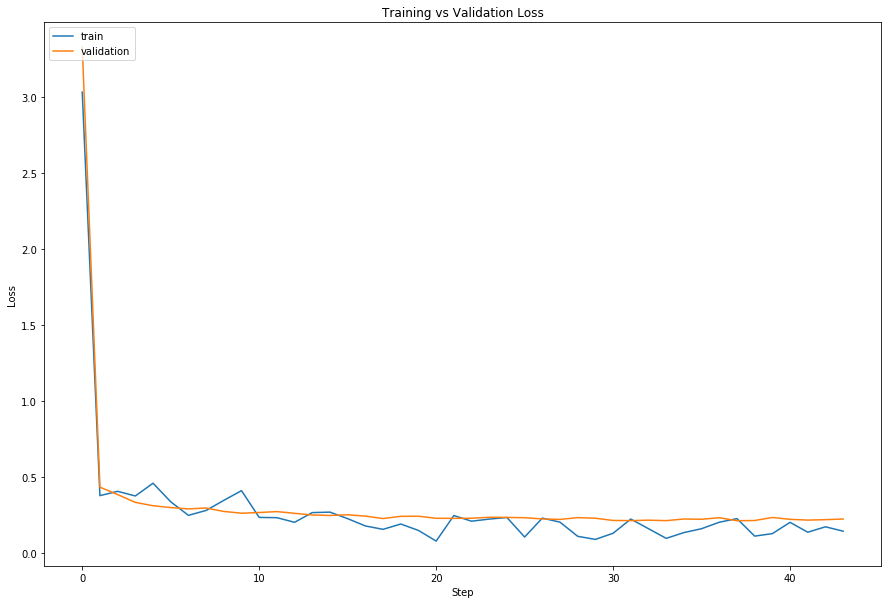

In [30]:
plt.figure(figsize=(15,10))    
plt.plot(loss_trainplt)
plt.plot(loss_valplt)
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Step')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we can see, at first the model is bad when identifying the clothes. But after many train, it become better and better. 

In [31]:
prediction_sample = tf.argmax(y_CNN,1)
print (prediction_sample.eval(feed_dict={x: fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 1.0}))

[9 2 1 ... 8 1 5]


#Confussion Matrix

Lets make the confusion matrix. We can create it using tensorflow confusion matrix, and itertools.

In [32]:
confusion = tf.confusion_matrix(
       labels = tf.argmax( fashion_mnist.test.labels, 1 ),
       predictions = tf.argmax( y_CNN, 1 ) ) #rumus menghitung confussion matrix dengan tensorflow
matrix = confusion.eval({x: fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 1.0}).astype(int)
print(matrix) 

[[878   0  16   7   5   1  91   0   2   0]
 [  1 986   2   5   4   0   1   0   1   0]
 [ 18   1 873   4  74   0  30   0   0   0]
 [ 12   4  17 889  55   0  23   0   0   0]
 [  0   0  36   7 934   0  23   0   0   0]
 [  0   0   0   0   0 991   0   8   0   1]
 [103   2  72  18 100   0 702   0   3   0]
 [  0   0   0   0   0  10   0 985   0   5]
 [  3   1   1   1   6   2   2   2 982   0]
 [  0   0   0   0   0   9   2  47   0 942]]


In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt =  'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

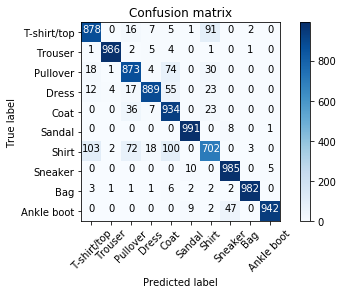

In [34]:
plt.figure()
plot_confusion_matrix(matrix, classes=labels,normalize= False,  title='Confusion matrix')

How its testing accuracy, we can use sklearn to make great report of it!

In [35]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
prediction = tf.argmax(y_CNN,1)
hasil = prediction.eval(feed_dict={x: fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 1.0})
le = preprocessing.LabelEncoder()
le.fit(labels)

print (classification_report(datatest,hasil, target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.86      0.87      0.87      1000
       Dress       0.95      0.89      0.92      1000
        Coat       0.79      0.93      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.80      0.70      0.75      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.99      0.94      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [36]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: fashion_mnist.test.images, y_: fashion_mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9162


#Visualizing Output Data

Want to know how our machine makes it? Here it is.

In [0]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32,-1]))

Show 5x5 kernel.

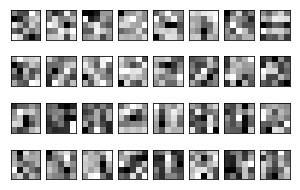

In [38]:
plt.figure(1 , figsize=(5,5))
for i in range(32):
    plt.subplot(6, 8, i+1)
    plt.imshow(kernels[i].reshape(5,5), interpolation="nearest", cmap="gray")
    plt.xticks([])
    plt.yticks([])

Here some sample image, and when processing in first and second convolutional layer

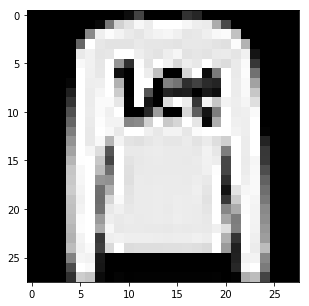

In [39]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = fashion_mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")
plt.show()

**Menampilkan citra konvolusi layer pertama**

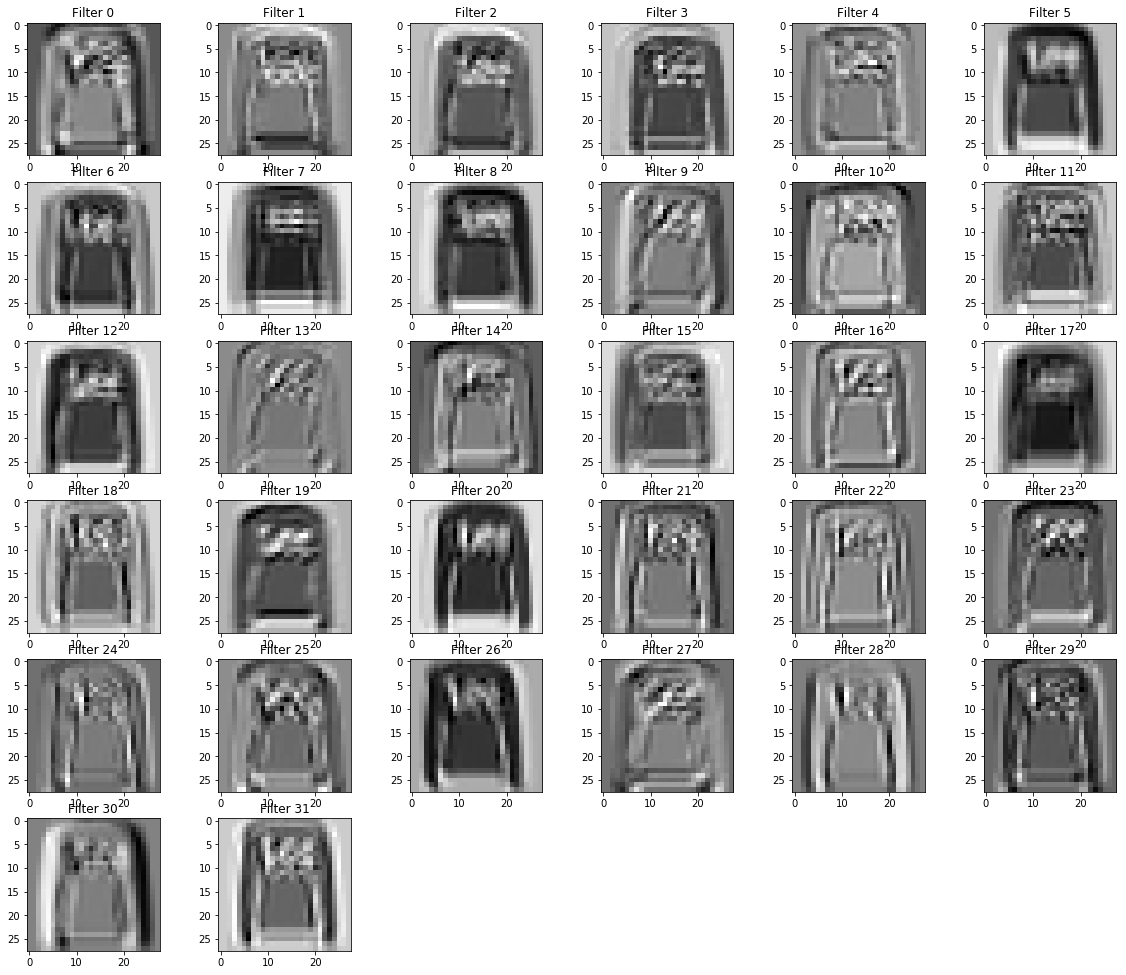

In [40]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

**Menampilkan citra konvolusi layer kedua**

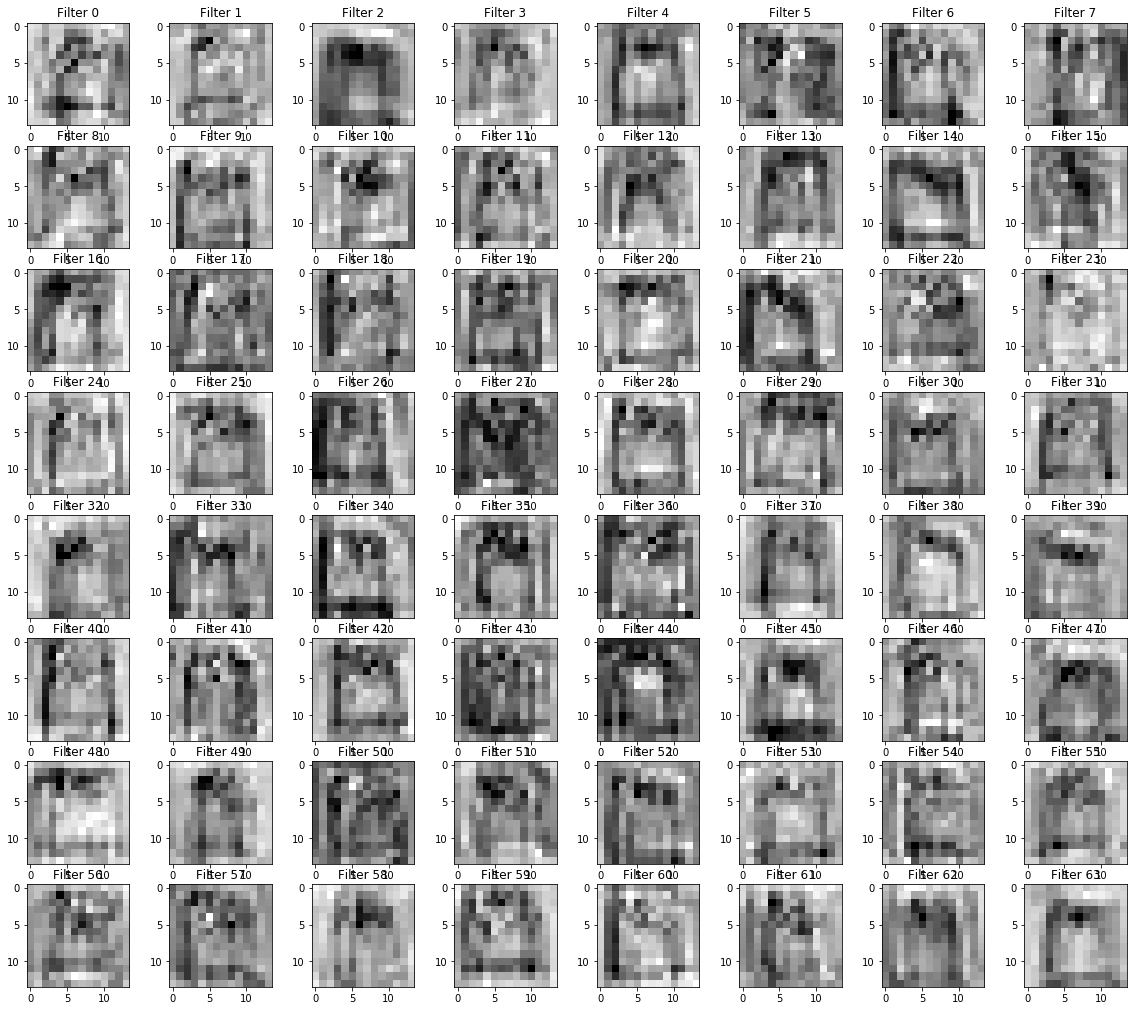

In [41]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:
sess.close() #mengakhiri session

Thank You!!